In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import matplotlib.scale
plt.style.use('seaborn')

In [2]:
N = 32
neuron_indices = np.arange(N)
scaled_cosine = lambda neuron_indices, N: (1 + np.cos(2*np.pi*neuron_indices/N))/2
gaussian = lambda neuron_indices, N: np.exp(-(neuron_indices - N/2)**2 /4)

profile_to_matrix = lambda profile: scipy.linalg.circulant(profile)
get_cosine_from_fourier_modes = lambda fourier_modes: np.fft.ifft(np.hstack((fourier_modes, np.flip(fourier_modes[1:-1])))).real

a = scaled_cosine(neuron_indices, N)

In [3]:
def simulate_and_plot(a0, W, dt=0.001, reps=100, noise=0.3, plot=True, show=True):
	a = np.tile(a0, (reps,1)).T
	a += noise*np.random.randn(*a.shape)

	# simulate for 50000 time steps
	for _ in range(50000):
		delta_a = -a + W@a
		a += dt*delta_a

	mu = a.mean(axis=1)
	stdev = np.sqrt(a.var(axis=1))
	mean_stdev = stdev.mean()

	if plot:
		plt.fill_between(neuron_indices, mu - stdev, mu + stdev, alpha=0.5, label='response stddev')
		plt.plot(neuron_indices, a[:,0], 'orange', label='example response')
		plt.plot(a0, 'k', label='original activity')
		plt.title(f'average stdev = {mean_stdev:.4f}')
		plt.legend()
		if show:
			plt.show()

	return mean_stdev

## Test how adding more Fourier modes effects the error

Fourier modes = [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


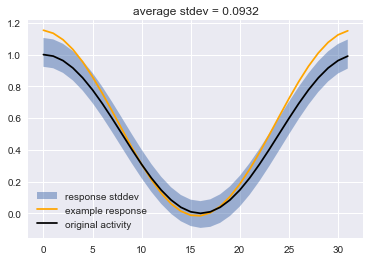

Fourier modes = [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


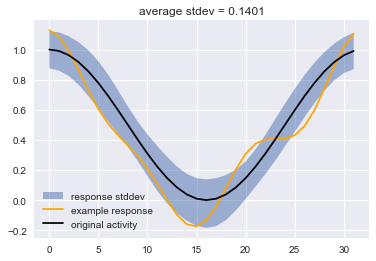

Fourier modes = [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


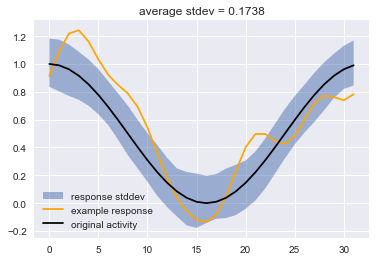

Fourier modes = [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


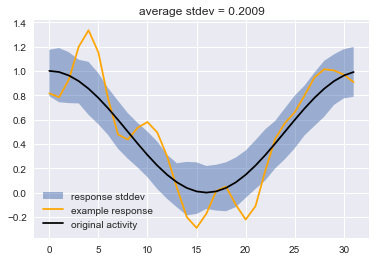

Fourier modes = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


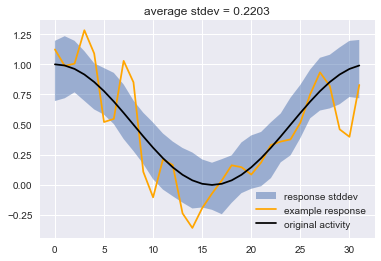

Fourier modes = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


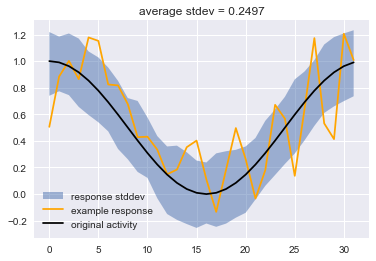

Fourier modes = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


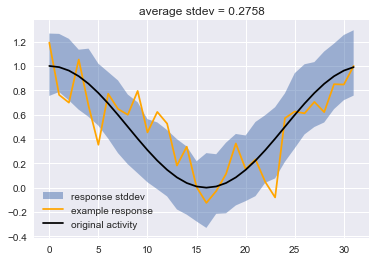

Fourier modes = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


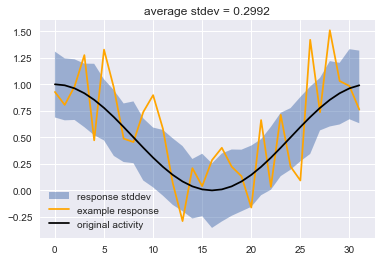

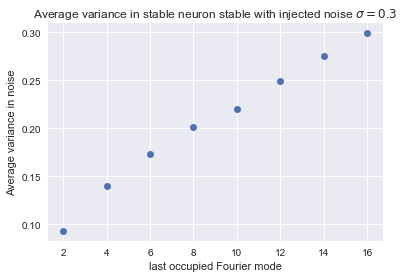

In [4]:
errors = []
noise_stddev = 0.3

last_mode_range = range(2,N//2+2,2)
for last_mode in last_mode_range:
	fw = np.zeros(N//2+1)
	fw[:last_mode] = 1

	W = profile_to_matrix(get_cosine_from_fourier_modes(fw))

	print(f'Fourier modes = {fw}')
	errors.append(simulate_and_plot(a, W, noise=noise_stddev))
plt.plot(last_mode_range, errors, 'o')
plt.xlabel('last occupied Fourier mode')
plt.ylabel('Average variance in noise')
plt.title(f'Average variance in stable neuron stable with injected noise $\\sigma={noise_stddev}$')
plt.show()

The error increases linearly with the number of extra Fourier modes, as predicted

$$||w \ast e|| \propto ||w||$$

## Test how increasing the number of neurons decreases the error

N = 4


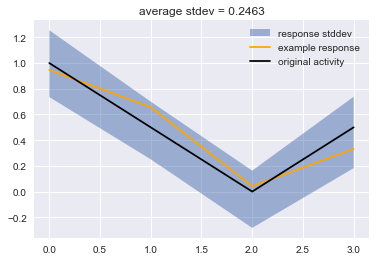

N = 8


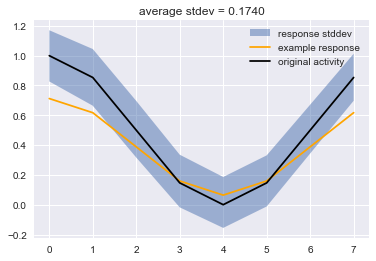

N = 16


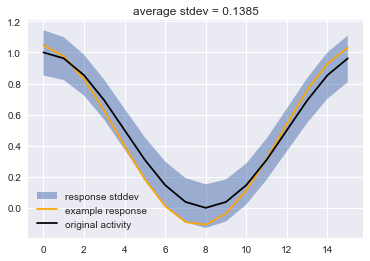

N = 32


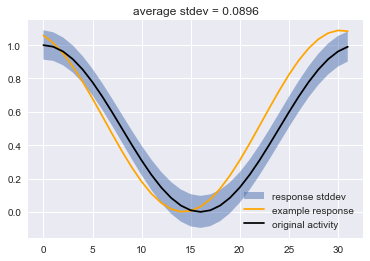

N = 64


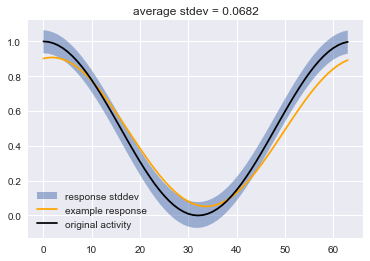

N = 128


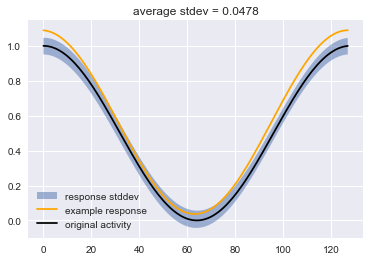

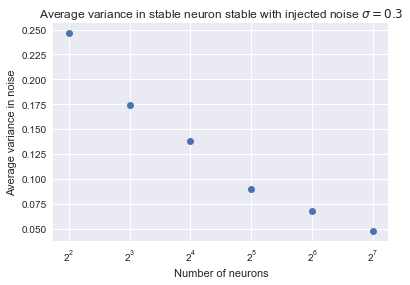

In [5]:
# test for the size of the network
errors = []

N_range = (2**np.arange(2,8)).astype(np.uint32)
for N in N_range:
	fw = np.zeros(N//2+1)
	fw[:2] = 1
	neuron_indices = np.arange(N)
	a = scaled_cosine(neuron_indices, N)

	W = profile_to_matrix(get_cosine_from_fourier_modes(fw))

	print(f'N = {N}')
	errors.append(simulate_and_plot(a, W, noise=noise_stddev))
plt.semilogx(N_range, errors, 'o')
plt.xlabel('Number of neurons')
plt.ylabel('Average variance in noise')
plt.title(f'Average variance in stable neuron stable with injected noise $\\sigma={noise_stddev}$')
plt.xscale('log', base=2)
# plt.xscale(matplotlib.scale.FuncScale(plt.gca(), (lambda x: np.sqrt(x), lambda x: x**2)))
plt.show()

The error decreases slower than logarithmically with the number of neurons